In [11]:
import utils
import pandas as pd
import datetime as dt
import pprint
import matplotlib.pyplot as plt
from sklearn import tree, model_selection


df = pd.read_csv("Sessionized_SquarePanda.csv", error_bad_lines=False)
df.head()


,childid,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
0,1004,0,2016-11-07 20:34:00,Lagoon,47,F,19,WORD,Not Known,1,NaN,0
1,1005,0,2016-11-07 20:52:00,Lagoon,7,F,7,WORD,Not Known,1,NaN,0
2,1005,0,2016-11-07 20:53:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,70,F,4,WORD,Not Known,1,NaN,0


In [12]:
df_1 = df.groupby(df['childid']).last()
df_1.head()

,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
childid,,,,,,,,,,,
183,3,2017-01-02 18:54:00,Lagoon,47,F,5,WORD,Not Known,1,8.0,0
188,2,2017-01-30 06:26:00,Bowling,158,M,5,WORD,Not Known,1,22.0,0
189,2,2017-05-29 00:08:00,Jiggity Jamble,175,M,6,WORD,iOS,1,43.0,1
191,4,2017-04-28 18:23:00,Lagoon,98,M,7,WORD,Android,1,4.0,0
193,4,2016-11-25 19:33:00,Bubbles,144,F,5,WORD,Not Known,1,24484.0,1


In [4]:
#from matplotlib import pyplot as plt
#from matplotlib import style
#style.use('ggplot')
#x1=df_1.index.values
#y1=df_1['session_id']

#plt.scatter(x1,y1,color='g')
#plt.title('childid v/s sessionid')
#plt.xlabel('Child ID')
#plt.ylabel('No of Sessions')
#plt.ylim(0,100)
#plt.figure(figsize=(200,150))
#plt.show()



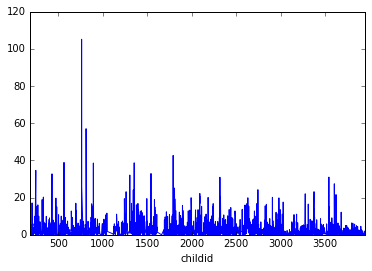

In [13]:
df_1=df.groupby(['childid'])['session_id'].mean()
df_1.plot.line(x='childid',y='session_id')
plt.show()

### Average number of sessions per user is 10.2765

In [14]:
df.groupby(['childid','session_id'])['session_id'].count().mean()
#df.groupby(['childid'])['session_id'].count().plot(x=df.childid,y=df.session_id.count(),kind='bar')


#df_1.plot(x=df_1.index,y=df_1['session_id'])
#plt.show()

6.3605808012906699

### Average number of activities per session is 6

# Lets find how many unique games a child plays per session

## Lets make a groupby object for each childid and a particular sessionid and find all unique games for that session for that child

In [6]:
df.groupby(['childid','session_id'])['gamename'].nunique().mean()

1.4484538854530788

# To confirm our values let's check manually as below

In [89]:
df.loc[df['childid'] == 183]

,childid,session_id,createdat,gamename,minutes_since_last_interval,new_event_boundary
25559,183,0,2016-11-10 14:46:00,Lagoon,NaN,0
25560,183,1,2016-11-11 02:26:00,Bubbles,700.0,1
25561,183,1,2016-11-11 02:27:00,Bubbles,1.0,0
25562,183,1,2016-11-11 02:33:00,Bubbles,6.0,0
25563,183,1,2016-11-11 02:35:00,Bubbles,2.0,0
25564,183,1,2016-11-11 02:38:00,Bubbles,3.0,0
25565,183,2,2016-11-11 14:20:00,Bubbles,702.0,1
25566,183,2,2016-11-11 14:29:00,Bubbles,9.0,0
25567,183,2,2016-11-11 14:50:00,Lagoon,21.0,0
25568,183,3,2017-01-02 18:46:00,Bubbles,75116.0,1


## For childid 183 the no of unique games per session perfectly matches our results